<a href="https://colab.research.google.com/github/proffix4/BQ_RST/blob/master/%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%D0%A2%D0%B0%D0%BB%D0%B8%D0%BF%D0%BE%D0%B2_Project_CNN_Age_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ü—Ä–æ–µ–∫—Ç: CNN –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ª–∏—Ü –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –æ–∫—Ä—É–∂–µ–Ω–∏—è

In [ ]:
# # –£—Å—Ç–∞–Ω–æ–≤–∫–∞ / –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
# !pip install -q --upgrade torch torchvision timm albumentations opencv-python-headless scikit-learn torchsummary tqdm pandas matplotlib
# !pip install -q imagehash pillow
# !pip install seaborn

## –ò–º–ø–æ—Ä—Ç –∏ –±–∞–∑–æ–≤—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏

In [ ]:
# –ò–º–ø–æ—Ä—Ç
import os, zipfile, random, json, shutil, math, time
from pathlib import Path

import torch, torchvision
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchsummary import summary
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm
import random
import albumentations as A
from albumentations.pytorch import ToTensorV2

import cv2
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import imagehash

import hashlib, collections, itertools
from pathlib import Path
from tqdm.auto import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

# –î–µ–≤–∞–π—Å
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using:', device)


Using: cpu


## –°–∫–∞—á–∏–≤–∞–Ω–∏–µ –∏ —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –°–∫–∞—á–∏–≤–∞–Ω–∏–µ –∏ —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∞ data.zip (–¥–ª—è –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ –ü–ö, –±–µ–∑ Google Colab)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import subprocess, sys, zipfile
from pathlib import Path

# 1. URL –∞—Ä—Ö–∏–≤–∞ –Ω–∞ Google Drive
DATA_ZIP_URL = "https://drive.google.com/uc?id=1ExAQWzA1IkRus0OBiNNj08yO_wzc35B5"
zip_path = Path("data.zip")

# 2. gdown: –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ–º, —á—Ç–æ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω
try:
    import gdown
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "gdown"])
    import gdown

# 3. —Å–∫–∞—á–∏–≤–∞–µ–º, –µ—Å–ª–∏ –µ—â—ë –Ω–µ—Ç
if not zip_path.exists():
    print("–°–∫–∞—á–∏–≤–∞—é data.zip ‚Ä¶")
    gdown.download(DATA_ZIP_URL, str(zip_path), quiet=False)
else:
    print("data.zip —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç ‚Äî –ø—Ä–æ–ø—É—Å–∫–∞—é —Å–∫–∞—á–∏–≤–∞–Ω–∏–µ.")

# 4. —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∞
print("–†–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞—é ‚Ä¶")
with zipfile.ZipFile(zip_path, "r") as zf:
    zf.extractall("data")

# 5. –±—ã—Å—Ç—Ä–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞
data_root = Path("data")
print("train samples:", len(list((data_root / "train").glob("*"))))
print("test  samples:", len(list((data_root / "test").glob("*"))))


data.zip —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç ‚Äî –ø—Ä–æ–ø—É—Å–∫–∞—é —Å–∫–∞—á–∏–≤–∞–Ω–∏–µ.
–†–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞—é ‚Ä¶
train samples: 10099
test  samples: 102


## –†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (EDA)

In [ ]:
# –ó–∞–¥–∞—ë–º –ø–∞–ø–∫–∏ –¥–ª—è —Ç–µ—Å—Ç–∞ –∏ –æ–±—É—á–µ–Ω–∏—è
train_dir = data_root / 'train'
test_dir  = data_root / 'test'

In [ ]:
# -- 1. –°–∫–∞–Ω–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ —Å–æ–±–∏—Ä–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
def collect_meta(folder: Path):
    records = []
    for img_path in tqdm(list(folder.glob('*.jpg')), desc=f'Scanning {folder.name}'):
        try:
            label = int(img_path.stem.split('_')[0])      # –º–µ—Ç–∫–∞ = —á–∏—Å–ª–æ –¥–æ "_"
            img = cv2.imread(str(img_path))
            h, w = img.shape[:2]
            records.append({
                'split' : folder.name,
                'path'  : str(img_path),
                'label' : label,
                'width' : w,
                'height': h,
            })
        except Exception as e:
            print('‚ö†Ô∏è', img_path, e)
    return records

meta_records = collect_meta(train_dir) + collect_meta(test_dir)
df_meta = pd.DataFrame(meta_records)
print('DataFrame shape:', df_meta.shape)
df_meta.head()

Scanning train:   0%|          | 0/10098 [00:00<?, ?it/s]

‚ö†Ô∏è data\train\0nan_5555.jpg invalid literal for int() with base 10: '0nan'


Scanning test:   0%|          | 0/102 [00:00<?, ?it/s]

DataFrame shape: (10199, 5)


split                   path  label  width  height
0  train  data\train\0_1001.jpg      0    200     200
1  train  data\train\0_1005.jpg      0    200     200
2  train  data\train\0_1019.jpg      0    200     200
3  train  data\train\0_1022.jpg      0    200     200
4  train  data\train\0_1024.jpg      0    200     200

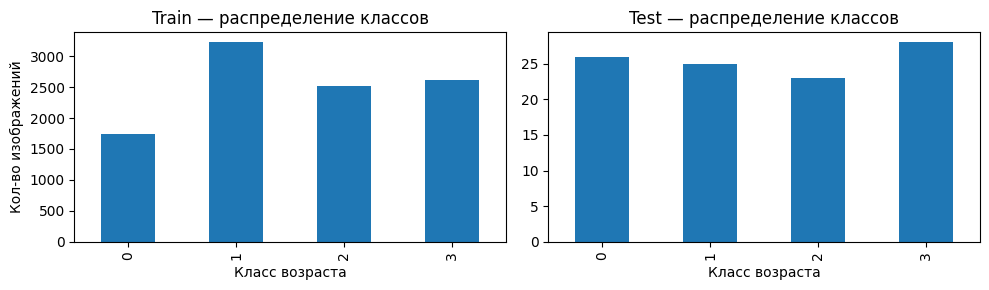

In [ ]:
# -- 2. –ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (train / test)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

(df_meta[df_meta.split == 'train'].label
       .value_counts()
       .sort_index()
       .plot(kind='bar', ax=axes[0], title='Train ‚Äî —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤'))
axes[0].set_xlabel('–ö–ª–∞—Å—Å –≤–æ–∑—Ä–∞—Å—Ç–∞')
axes[0].set_ylabel('–ö–æ–ª-–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π')

(df_meta[df_meta.split == 'test'].label
       .value_counts()
       .sort_index()
       .plot(kind='bar', ax=axes[1], title='Test ‚Äî —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤'))
axes[1].set_xlabel('–ö–ª–∞—Å—Å –≤–æ–∑—Ä–∞—Å—Ç–∞')

plt.tight_layout(); plt.show()

In [ ]:
# -- 2. –ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (train / test)
print('\nTrain summary:')
print(df_meta[df_meta.split == 'train'].groupby('label').size())

print('\nTest summary:')
print(df_meta[df_meta.split == 'test'].groupby('label').size())



Train summary:
label
0    1743
1    3223
2    2521
3    2610
dtype: int64

Test summary:
label
0    26
1    25
2    23
3    28
dtype: int64


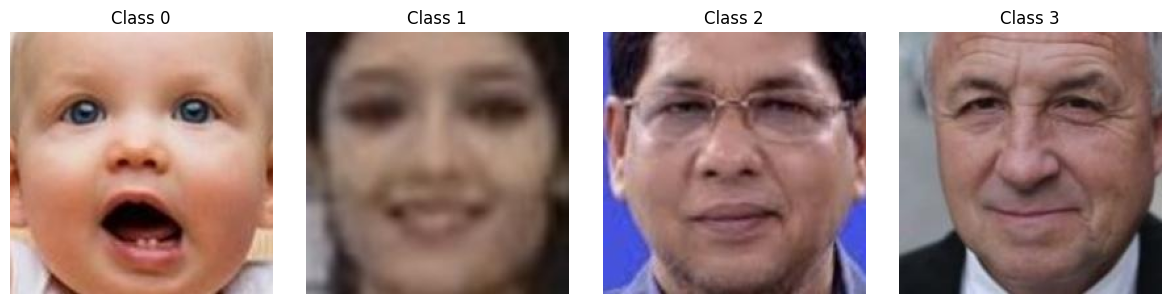

In [ ]:
# -- 3. –í–∏–∑—É–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞: –ø–æ –æ–¥–Ω–æ–º—É –ø—Ä–∏–º–µ—Ä—É –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for cls in range(4):
    sample_path = random.choice(
        df_meta[(df_meta.label == cls) & (df_meta.split == 'train')].path.values
    )
    img = cv2.cvtColor(cv2.imread(sample_path), cv2.COLOR_BGR2RGB)
    axes[cls].imshow(img)
    axes[cls].set_title(f'Class {cls}')
    axes[cls].axis('off')
plt.tight_layout(); plt.show()


In [ ]:
# ‚ñ∂Ô∏è –ù–∞–π—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–µ 200√ó200
non_200 = df_meta[(df_meta.width != 200) | (df_meta.height != 200)]
print(f'–í—Å–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π ‚â† 200√ó200: {len(non_200)}')
display(non_200.head())


–í—Å–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π ‚â† 200√ó200: 100


split                    path  label  width  height
4966  train  data\train\2_10007.jpg      2    202     244
4967  train  data\train\2_10008.jpg      2    455     471
4968  train  data\train\2_10009.jpg      2    363     303
4969  train  data\train\2_10011.jpg      2    565     410
4970  train  data\train\2_10012.jpg      2    280     531

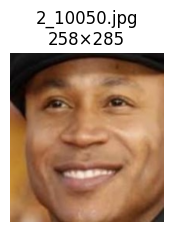

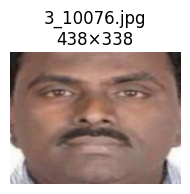

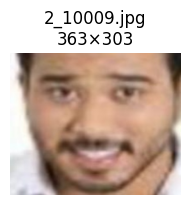

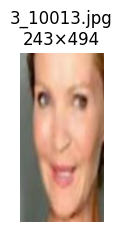

In [ ]:
# ‚ñ∂Ô∏è 4 —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞
sample_paths = non_200.sample(min(4, len(non_200)), random_state=0).path.tolist()

for p in sample_paths:
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(2.2,2.2))
    plt.imshow(img)
    plt.title(f'{Path(p).name}\n{img.shape[1]}√ó{img.shape[0]}')
    plt.axis('off')
    plt.show()

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –Ω–∞–∑–≤–∞–Ω–∏–∏ –∏ —Ä–∞–∑–º–º–µ—Ä–æ–≤

In [ ]:
# ‚ñ∂Ô∏è –£–¥–∞–ª—è–µ–º —Ñ–∞–π–ª—ã —Å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏
from pathlib import Path

bad_files = [
    Path('data/train/0nan_5555.jpg'),
    Path('data/test/0???.jpg'),
]

for f in bad_files:
    if f.exists():
        f.unlink()      # —É–¥–∞–ª—è–µ–º —Ñ–∞–π–ª
        print('Deleted:', f)
    else:
        print('Not found (already deleted?):', f)


Deleted: data\train\0nan_5555.jpg
Not found (already deleted?): data\test\0???.jpg


In [ ]:
# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º —Ñ–∞–π–ª—ã —Å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º–∏ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ–º
# non_200 —É–∂–µ —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—É—Ç–∏ ¬´–Ω–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö¬ª —Ñ–∞–π–ª–æ–≤
for img_path in tqdm(non_200.path, desc='Resizing to 200√ó200'):
    img = cv2.imread(img_path)
    if img is None:
        print('‚ö†Ô∏è –ù–µ —É–¥–∞–ª–æ—Å—å –ø—Ä–æ—á–∏—Ç–∞—Ç—å', img_path)
        continue
    h, w = img.shape[:2]
    # –µ—Å–ª–∏ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –º–µ–Ω—å—à–µ 200 px, INTER_CUBIC; –µ—Å–ª–∏ –±–æ–ª—å—à–µ ‚Äî INTER_AREA
    interp = cv2.INTER_CUBIC if (h < 200 or w < 200) else cv2.INTER_AREA
    img_resized = cv2.resize(img, (200, 200), interpolation=interp)
    cv2.imwrite(img_path, img_resized)

print('–ì–æ—Ç–æ–≤–æ! –í—Å–µ —Ñ–∞–π–ª—ã –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ 200√ó200.')

Resizing to 200√ó200:   0%|          | 0/100 [00:00<?, ?it/s]

–ì–æ—Ç–æ–≤–æ! –í—Å–µ —Ñ–∞–π–ª—ã –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ 200√ó200.


In [ ]:
# ‚ñ∂Ô∏è –ü–µ—Ä–µ–ø—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–æ–≤ –ø–æ—Å–ª–µ —Ä–µ—Å–∞–π–∑–∞
df_check = pd.DataFrame(
    collect_meta(train_dir) + collect_meta(test_dir)   # —Ñ—É–Ω–∫—Ü–∏—è collect_meta —É–∂–µ –æ–±—ä—è–≤–ª–µ–Ω–∞
)

leftovers = df_check[(df_check.width != 200) | (df_check.height != 200)]
print(f'–§–∞–π–ª–æ–≤ ‚â† 200√ó200 –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {len(leftovers)}')

if len(leftovers) == 0:
    print('‚úÖ –í—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ç–µ–ø–µ—Ä—å 200√ó200 px')
else:
    display(leftovers.head())        # –ø–æ–∫–∞–∂–µ–º –ø–µ—Ä–≤—ã–µ ¬´–ø—Ä–æ–±–ª–µ–º–Ω—ã–µ¬ª (–µ—Å–ª–∏ –≤–¥—Ä—É–≥ –µ—Å—Ç—å)

Scanning train:   0%|          | 0/10097 [00:00<?, ?it/s]

Scanning test:   0%|          | 0/102 [00:00<?, ?it/s]

–§–∞–π–ª–æ–≤ ‚â† 200√ó200 –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: 0
‚úÖ –í—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ç–µ–ø–µ—Ä—å 200√ó200 px


## –ò–∑—É—á–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏

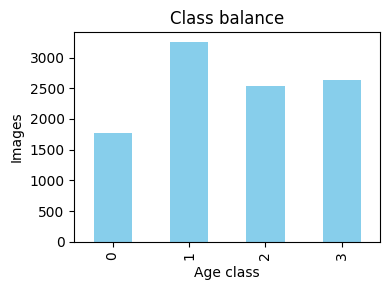

‚è≥ –í—ã—á–∏—Å–ª—è—é —Ö—ç—à–∏ –¥–ª—è –ø–æ–∏—Å–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤‚Ä¶


hashing:   0%|          | 0/10199 [00:00<?, ?it/s]

‚ñ™ MD5-–¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≥—Ä—É–ø–ø:   77
‚ñ™ aHash-–¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≥—Ä—É–ø–ø: 250
‚è≥ –û–ø—Ä–µ–¥–µ–ª—è—é —Ü–≤–µ—Ç/—á/–±‚Ä¶


modality:   0%|          | 0/10199 [00:00<?, ?it/s]

‚ñ™ Grayscale –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π : 268
‚ñ™ –¶–≤–µ—Ç–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π   : 9931
‚è≥ –ê–Ω–∞–ª–∏–∑–∏—Ä—É—é —è—Ä–∫–æ—Å—Ç—å‚Ä¶


brightness:   0%|          | 0/10199 [00:00<?, ?it/s]

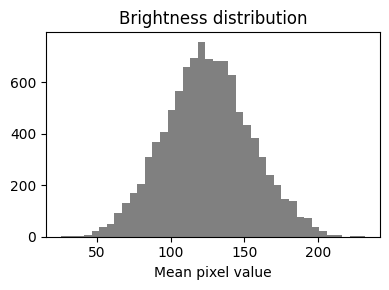

‚ñ™ –°–ª–∏—à–∫–æ–º —Ç—ë–º–Ω—ã—Ö/—è—Ä–∫–∏—Ö –∫–∞–¥—Ä–æ–≤: 0
‚è≥ –û—Ü–µ–Ω–∏–≤–∞—é —Ä–µ–∑–∫–æ—Å—Ç—å‚Ä¶


laplacian:   0%|          | 0/10199 [00:00<?, ?it/s]

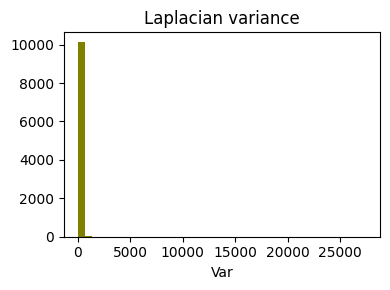

‚ñ™ –†–∞–∑–º—ã—Ç—ã—Ö (var < 50): 6819
‚úì –ü—Ä–æ–≤–µ—Ä–∫–∏ –∑–∞–≤–µ—Ä—à–µ–Ω—ã ‚Äî –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ –ø—Ä–æ–±–ª–µ–º —Ñ–∞–π–ª—ã —Å–ø–∏—Å–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.


In [ ]:
# 1. –ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(4,3))
(df_check.label.value_counts().sort_index()
   .plot(kind='bar', color='skyblue', title='Class balance'))
plt.xlabel('Age class'); plt.ylabel('Images'); plt.tight_layout(); plt.show()

# 2. –î—É–±–ª–∏–∫–∞—Ç—ã –ø–æ MD5 –∏ aHash ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print('‚è≥ –í—ã—á–∏—Å–ª—è—é —Ö—ç—à–∏ –¥–ª—è –ø–æ–∏—Å–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤‚Ä¶')
md5_map, ahash_map = collections.defaultdict(list), collections.defaultdict(list)

for p in tqdm(df_check.path, desc='hashing'):
    with open(p, 'rb') as f:
        md5_map[hashlib.md5(f.read()).hexdigest()].append(p)
    ahash_map[str(imagehash.average_hash(Image.open(p)))].append(p)

dup_md5   = [v for v in md5_map.values()   if len(v) > 1]
dup_ahash = [v for v in ahash_map.values() if len(v) > 1]

print(f'‚ñ™ MD5-–¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≥—Ä—É–ø–ø:   {len(dup_md5)}')
print(f'‚ñ™ aHash-–¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≥—Ä—É–ø–ø: {len(dup_ahash)}')

# 3. –ú–æ–¥–∞–ª—å–Ω–æ—Å—Ç—å: RGB vs grayscale ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print('‚è≥ –û–ø—Ä–µ–¥–µ–ª—è—é —Ü–≤–µ—Ç/—á/–±‚Ä¶')
is_gray = []
for p in tqdm(df_check.path, desc='modality'):
    img = cv2.imread(p)
    gray_flag = np.all(img[...,0] == img[...,1]) and np.all(img[...,1] == img[...,2])
    is_gray.append(gray_flag)

df_check['is_gray'] = is_gray
print(f'‚ñ™ Grayscale –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π : {df_check.is_gray.sum()}')
print(f'‚ñ™ –¶–≤–µ—Ç–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π   : {len(df_check) - df_check.is_gray.sum()}')

# 4. –Ø—Ä–∫–æ—Å—Ç—å: –ø–æ–∏—Å–∫ —Ç—ë–º–Ω—ã—Ö/–ø–µ—Ä–µ—Å–≤–µ—á–µ–Ω–Ω—ã—Ö ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print('‚è≥ –ê–Ω–∞–ª–∏–∑–∏—Ä—É—é —è—Ä–∫–æ—Å—Ç—å‚Ä¶')
brightness = []
for p in tqdm(df_check.path, desc='brightness'):
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    brightness.append(img.mean())

df_check['brightness'] = brightness
plt.figure(figsize=(4,3))
plt.hist(df_check['brightness'], bins=40, color='gray')
plt.title('Brightness distribution'); plt.xlabel('Mean pixel value')
plt.tight_layout(); plt.show()

extreme = df_check[(df_check.brightness < 20) | (df_check.brightness > 235)]
print(f'‚ñ™ –°–ª–∏—à–∫–æ–º —Ç—ë–º–Ω—ã—Ö/—è—Ä–∫–∏—Ö –∫–∞–¥—Ä–æ–≤: {len(extreme)}')

# 5. –†–∞–∑–º—ã—Ç–æ—Å—Ç—å: variance of Laplacian ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print('‚è≥ –û—Ü–µ–Ω–∏–≤–∞—é —Ä–µ–∑–∫–æ—Å—Ç—å‚Ä¶')
lap_vars = []
for p in tqdm(df_check.path, desc='laplacian'):
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    lap_vars.append(cv2.Laplacian(img, cv2.CV_64F).var())

df_check['lap_var'] = lap_vars
plt.figure(figsize=(4,3))
plt.hist(df_check['lap_var'], bins=40, color='olive')
plt.title('Laplacian variance'); plt.xlabel('Var'); plt.tight_layout(); plt.show()

blur_thresh = 50
blurry = df_check[df_check.lap_var < blur_thresh]
print(f'‚ñ™ –†–∞–∑–º—ã—Ç—ã—Ö (var < {blur_thresh}): {len(blurry)}')

# (–æ–ø—Ü.) —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –ø—Ä–æ–±–ª–µ–º–Ω—ã–µ —Å–ø–∏—Å–∫–∏
pd.Series(itertools.chain(*dup_md5)).to_csv('duplicate_md5.txt',   index=False, header=False)
pd.Series(itertools.chain(*dup_ahash)).to_csv('duplicate_ahash.txt', index=False, header=False)
extreme.path.to_csv('extreme_brightness.txt', index=False, header=False)
blurry.path.to_csv('blurry_images.txt',       index=False, header=False)

print('‚úì –ü—Ä–æ–≤–µ—Ä–∫–∏ –∑–∞–≤–µ—Ä—à–µ–Ω—ã ‚Äî –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ –ø—Ä–æ–±–ª–µ–º —Ñ–∞–π–ª—ã —Å–ø–∏—Å–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.')

–í—Å–µ–≥–æ grayscale –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: 268


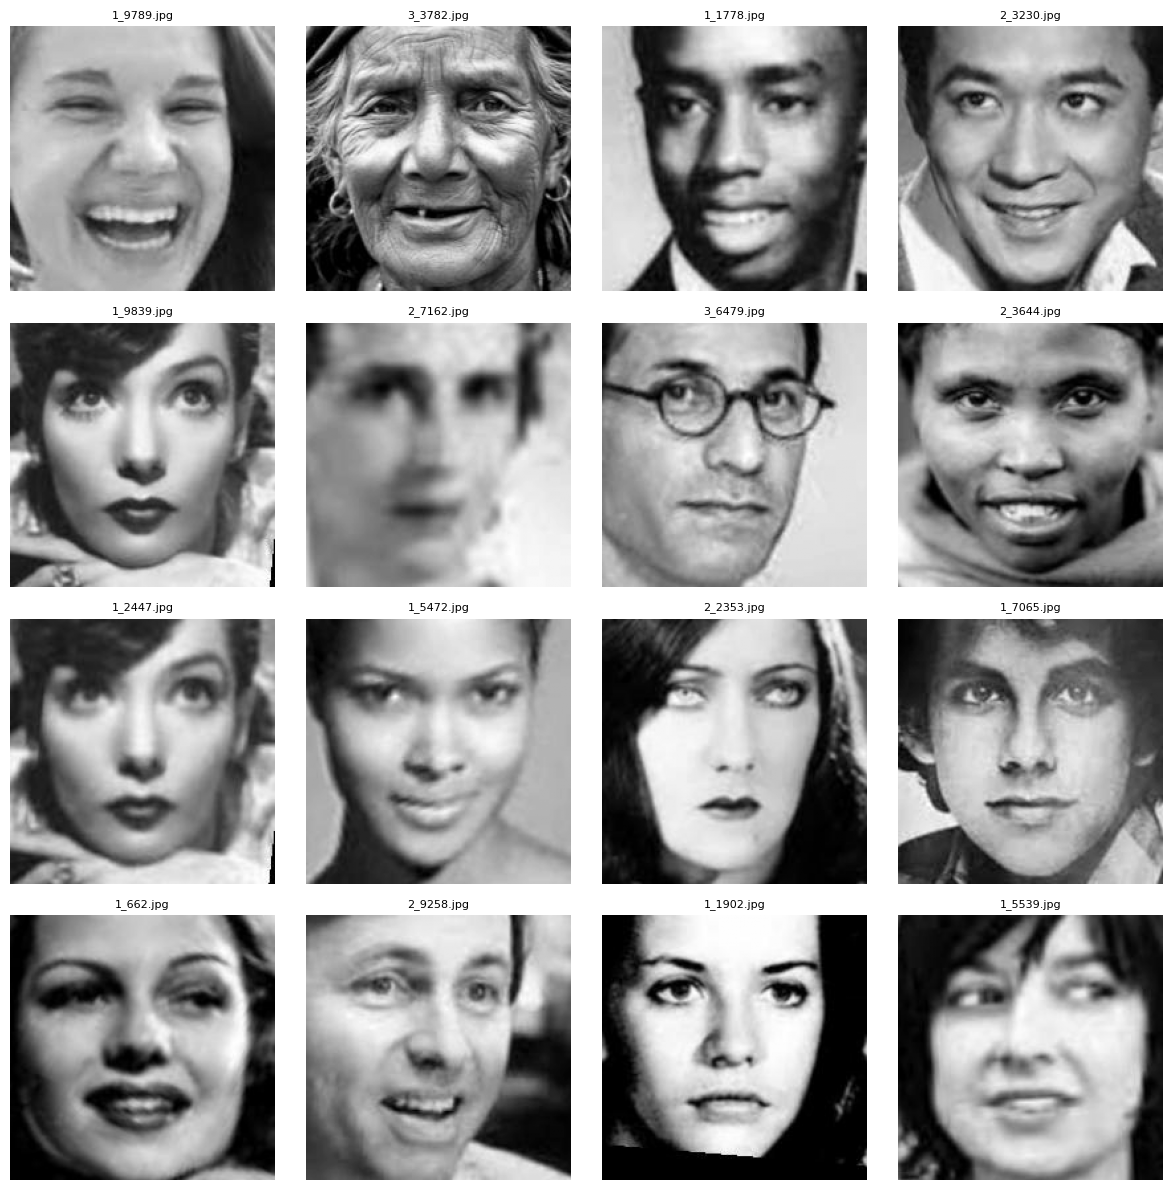

In [ ]:
# ‚ñ∂Ô∏è –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —á/–± (grayscale) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
# df_check —É–∂–µ —Å–æ–¥–µ—Ä–∂–∏—Ç —Å—Ç–æ–ª–±–µ—Ü is_gray, —Å–æ–∑–¥–∞–Ω–Ω—ã–π –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–º —à–∞–≥–µ
gray_df = df_check[df_check.is_gray]
print(f'–í—Å–µ–≥–æ grayscale –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {len(gray_df)}')

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
sample_n = min(16, len(gray_df))          # –ø–æ–∫–∞–∂–µ–º –º–∞–∫—Å–∏–º—É–º 16 —à—Ç—É–∫
cols, rows = 4, math.ceil(sample_n / 4)

sample_paths = gray_df.sample(sample_n, random_state=42).path.tolist()

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
axes = axes.flatten()

for ax, p in zip(axes, sample_paths):
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)    # —á–∏—Ç–∞–µ–º –∫–∞–∫ 1-–∫–∞–Ω–∞–ª—å–Ω–æ–µ
    ax.imshow(img, cmap='gray')
    ax.set_title(Path(p).name, fontsize=8)
    ax.axis('off')

# —Å–∫—Ä—ã–≤–∞–µ–º –ª–∏—à–Ω–∏–µ —è—á–µ–π–∫–∏, –µ—Å–ª–∏ sample_n < rows*cols
for ax in axes[len(sample_paths):]:
    ax.axis('off')

plt.tight_layout(); plt.show()


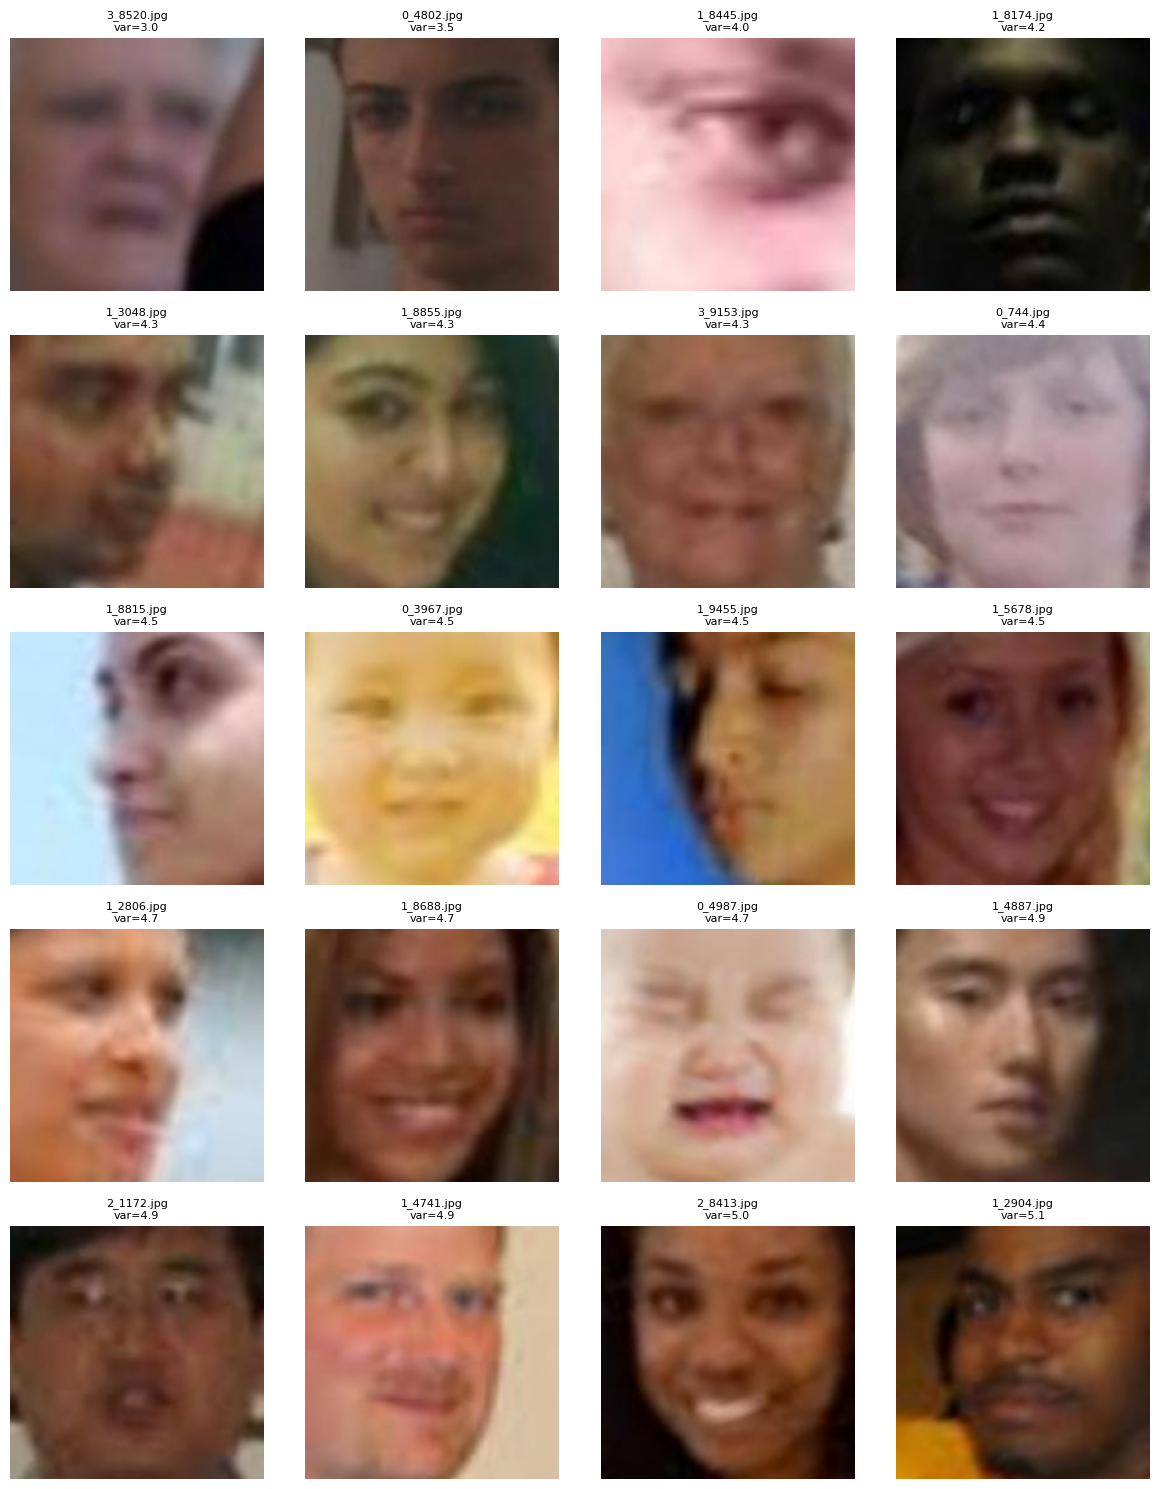

In [ ]:
# ‚ñ∂Ô∏è –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å–∞–º—ã—Ö ¬´–º—ã–ª—å–Ω—ã—Ö¬ª (variance-of-Laplacian –º–∏–Ω–∏–º–∞–ª—å–Ω–∞)
# —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Å—Ç–æ–ª–±–µ—Ü lap_var —Å—É—â–µ—Å—Ç–≤—É–µ—Ç
assert 'lap_var' in df_check.columns, "–°–Ω–∞—á–∞–ª–∞ –≤—ã—á–∏—Å–ª–∏—Ç–µ df_check['lap_var'] (variance of Laplacian)"

k = 20                          # —Å–∫–æ–ª—å–∫–æ —Å–∞–º—ã—Ö —Ä–∞–∑–º—ã—Ç—ã—Ö –ø–æ–∫–∞–∑–∞—Ç—å
top_blur = df_check.sort_values('lap_var').head(k)

rows, cols = math.ceil(k / 4), 4
fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
axes = axes.flatten()

for ax, (_, row) in zip(axes, top_blur.iterrows()):
    img = cv2.cvtColor(cv2.imread(row.path), cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(f"{Path(row.path).name}\nvar={row.lap_var:.1f}", fontsize=8)
    ax.axis('off')

# —Å–∫—Ä—ã–≤–∞–µ–º –ª–∏—à–Ω–∏–µ —è—á–µ–π–∫–∏, –µ—Å–ª–∏ k –Ω–µ –∫—Ä–∞—Ç–Ω–æ 4
for ax in axes[len(top_blur):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ —Ü–≤–µ—Ç–æ–≤

In [ ]:
#  1. –î—É–±–ª–∏–∫–∞—Ç—ã  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# —Å–æ–±–∏—Ä–∞–µ–º –µ–¥–∏–Ω—ã–π —Å–ø–∏—Å–æ–∫ ¬´–ª–∏—à–Ω–∏—Ö¬ª —Ñ–∞–π–ª–æ–≤ (–æ—Å—Ç–∞–≤–ª—è–µ–º –ø–µ—Ä–≤—ã–π —ç–∫–∑–µ–º–ø–ª—è—Ä)
dups_to_delete = set()

for group in dup_md5 + dup_ahash:
    group_sorted = sorted(group)                # —Ñ–∏–∫—Å–∏—Ä—É–µ–º –ø–æ—Ä—è–¥–æ–∫
    dups_to_delete.update(group_sorted[1:])     # –≤—Å—ë, –∫—Ä–æ–º–µ –ø–µ—Ä–≤–æ–≥–æ –≤ –≥—Ä—É–ø–ø–µ

print(f'–£–¥–∞–ª—è–µ–º {len(dups_to_delete)} —Ñ–∞–π–ª–æ–≤-–¥—É–±–ª–∏–∫–∞—Ç–æ–≤ ‚Ä¶')

deleted_on_disk = []                            # —á—Ç–æ–±—ã –ø–æ—Ç–æ–º –≤—ã—á–∏—Å—Ç–∏—Ç—å df_check
for p in dups_to_delete:
    fp = Path(p)
    if fp.exists():                             # —É–¥–∞–ª—è–µ–º –ø—Ä—è–º–æ –∏–∑ –ø–∞–ø–∫–∏
        try:
            fp.unlink()                         # == os.remove(fp)
            deleted_on_disk.append(p)
        except Exception as e:
            print('‚ö†Ô∏è', p, e)

# —Å–∏–Ω—Ö—Ä–æ–Ω–∏–∑–∏—Ä—É–µ–º df_check: —É–±–∏—Ä–∞–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ä–µ–∞–ª—å–Ω–æ —É–¥–∞–ª—ë–Ω–Ω—ã–º–∏ —Ñ–∞–π–ª–∞–º–∏
before = len(df_check)
df_check = df_check[~df_check.path.isin(deleted_on_disk)].reset_index(drop=True)
after  = len(df_check)

print(f'‚úî –£–¥–∞–ª–µ–Ω–æ —Å –¥–∏—Å–∫–∞: {len(deleted_on_disk)}')
print(f'–û–±–Ω–æ–≤–ª—ë–Ω df_check: {before} ‚Üí {after} –∑–∞–ø–∏—Å–µ–π')


–£–¥–∞–ª—è–µ–º 267 —Ñ–∞–π–ª–æ–≤-–¥—É–±–ª–∏–∫–∞—Ç–æ–≤ ‚Ä¶
‚úî –£–¥–∞–ª–µ–Ω–æ —Å –¥–∏—Å–∫–∞: 267
–û–±–Ω–æ–≤–ª—ë–Ω df_check: 10199 ‚Üí 9932 –∑–∞–ø–∏—Å–µ–π


–ü–æ—á—Ç–∏ –≤—Å–µ –ø—Ä–µ–¥-–æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏–∑ torchvision/timm (ResNet-50, EfficientNet, ViT –∏ —Ç. –¥.) –ø—Ä–∏–Ω–∏–º–∞—é—Ç —Ç–µ–Ω–∑–æ—Ä—ã —Ñ–æ—Ä–º—ã [B, 3, H, W]. –û–¥–Ω–æ–∫–∞–Ω–∞–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ ([B, 1, H, W]) –≤—ã–∑–æ–≤–µ—Ç –æ—à–∏–±–∫—É shapes mismatch.

In [ ]:
#  2. Grayscale ‚Üí 3-–∫–∞–Ω–∞–ª—å–Ω—ã–π RGB
gray_paths = df_check[df_check.is_gray].path.tolist()
print(f'–ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É—é {len(gray_paths)} —á/–± –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ 3-–∫–∞–Ω–∞–ª—å–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç‚Ä¶')

for p in gray_paths:
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)         # shape (H,W)
    if img is None:
        print('‚ö†Ô∏è –ù–µ –ø—Ä–æ—á–∏—Ç–∞–Ω', p); continue
    rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)       # 3-–∫–∞–Ω–∞–ª—å–Ω—ã–π
    cv2.imwrite(p, rgb)

–ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É—é 266 —á/–± –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ 3-–∫–∞–Ω–∞–ª—å–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç‚Ä¶


In [ ]:
# 3. –£–¥–∞–ª—è–µ–º 100 —Å–∞–º—ã—Ö ¬´–º—ã–ª—å–Ω—ã—Ö¬ª (—Å –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π lap_var)
assert 'lap_var' in df_check.columns, "—Å–Ω–∞—á–∞–ª–∞ –≤—ã—á–∏—Å–ª–∏—Ç–µ df_check['lap_var']"

n_remove   = 100
top_blur   = df_check.sort_values('lap_var').head(n_remove)
trash_dir  = Path('discarded_top_blurry')
trash_dir.mkdir(exist_ok=True)

moved = 0
for p in top_blur.path:
    src = Path(p)
    if src.exists():                      # –ø–µ—Ä–µ–º–µ—â–∞–µ–º —Ç–æ–ª—å–∫–æ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–µ
        shutil.move(src, trash_dir / src.name)
        moved += 1

# —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ –æ —Ä–µ–∞–ª—å–Ω–æ –ø–µ—Ä–µ–º–µ—â—ë–Ω–Ω—ã—Ö —Ñ–∞–π–ª–∞—Ö
df_check = df_check[~df_check.path.isin(top_blur.path[top_blur.path.apply(lambda s: Path(s).exists() is False)])]
df_check.reset_index(drop=True, inplace=True)

print(f'‚úî –ü–µ—Ä–µ–º–µ—â–µ–Ω–æ {moved} —Ñ–∞–π–ª–æ–≤ ‚Üí {trash_dir}/')
print('–û—Å—Ç–∞–ª–æ—Å—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤—ã–±–æ—Ä–∫–µ:', len(df_check))


‚úî –ü–µ—Ä–µ–º–µ—â–µ–Ω–æ 100 —Ñ–∞–π–ª–æ–≤ ‚Üí discarded_top_blurry/
–û—Å—Ç–∞–ª–æ—Å—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤—ã–±–æ—Ä–∫–µ: 9832


# 3. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏

In [ ]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 0) –ò—Ç–æ–≥–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_clean = df_check.copy().reset_index(drop=True)   # ‚Üê  —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä
print('df_clean:', df_clean.shape)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) –°—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Å–ø–ª–∏—Ç 70 / 15 / 15
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
from sklearn.model_selection import train_test_split

# —É–±–∏—Ä–∞–µ–º –∫–æ–ª–æ–Ω–∫—É split (train/test), –æ—Å—Ç–∞–≤–ª—è—è –ø—É—Ç—å –∏ –º–µ—Ç–∫—É
df_all = df_clean.drop(columns=['split'])
print('–í—Å–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è —Å–ø–ª–∏—Ç–∞:', len(df_all))

train_df, temp_df = train_test_split(
    df_all, test_size=0.30, stratify=df_all.label, random_state=42)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, stratify=temp_df.label, random_state=42)

print(f'Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}')


df_clean: (9832, 8)
–í—Å–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è —Å–ø–ª–∏—Ç–∞: 9832
Train: 6882 | Val: 1475 | Test: 1475


In [ ]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) Transforms / Dataset / DataLoader  (—á–∏—Å—Ç—ã–π torchvision, –±–µ–∑–æ–ø–∞—Å–Ω–æ –¥–ª—è Windows)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
from torchvision import transforms
from PIL import Image
import torch, numpy as np
from torch.utils.data import DataLoader

# ‚îÄ‚îÄ 1. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ torchvision ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                         std=(0.229, 0.224, 0.225)),
    # –∞–Ω–∞–ª–æ–≥ CoarseDropout: –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –ü–û–°–õ–ï Normalize –Ω–∞ —Ç–µ–Ω–∑–æ—Ä–µ
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.10), ratio=(0.3, 3.3),
                             value='random')
])

val_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                         std=(0.229, 0.224, 0.225)),
])

# ‚îÄ‚îÄ 2. Dataset –Ω–∞ PIL-Image ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
class AgeDataset(torch.utils.data.Dataset):
    def __init__(self, df, transform):
        self.paths   = df.path.values
        self.labels  = df.label.values.astype(np.int64)
        self.transform = transform

    def __len__(self): return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")   # —á–∏—Ç–∞–µ–º —á–µ—Ä–µ–∑ PIL
        img = self.transform(img)
        return img, self.labels[idx]

# ‚îÄ‚îÄ 3. DataLoader-—ã ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ù–∞ Windows –≤ Jupyter/VS Code –±–µ–∑–æ–ø–∞—Å–Ω–µ–µ num_workers=0 (–∏–Ω–∞—á–µ –≤–æ–∑–º–æ–∂–µ–Ω dead-lock)
NUM_WORKERS = 0          # –ø–æ–º–µ–Ω—è–π—Ç–µ –Ω–∞ >0, –µ—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –≤ Linux –∏–ª–∏ .py-—Å–∫—Ä–∏–ø—Ç–µ
PIN_MEMORY  = False      # pin_memory=True –ø–æ–ª–µ–∑–Ω–æ, —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –µ—Å—Ç—å CUDA-GPU

batch_size = 32
train_loader = DataLoader(AgeDataset(train_df, train_transforms),
                          batch_size=batch_size, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)

val_loader   = DataLoader(AgeDataset(val_df,   val_transforms),
                          batch_size=batch_size, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)

test_loader  = DataLoader(AgeDataset(test_df,  val_transforms),
                          batch_size=batch_size, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)

print('‚úÖ DataLoader-—ã –≥–æ—Ç–æ–≤—ã (torchvision only). –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ —à–∞–≥—É 4.')


‚úÖ DataLoader-—ã –≥–æ—Ç–æ–≤—ã (torchvision only). –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ —à–∞–≥—É 4.


# 4. –ú–æ–¥–µ–ª—å –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –æ–±—É—á–µ–Ω–∏—è

–í –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–º ResNet-50, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏—Ö–æ–¥–∏—Ç –∏–∑ torchvision.models.resnet50 (–∏–ª–∏ timm resnet50), –ø—Ä–∏–Ω—è—Ç–æ —Å—á–∏—Ç–∞—Ç—å ‚Äú—Å–ª–æ—ë–º‚Äù —Ç–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ü–∏–∏ —Å –æ–±—É—á–∞–µ–º—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:
–ò–¢–û–ì–û –æ–±—É—á–∞–µ–º—ã—Ö —Å–ª–æ—ë–≤	50

    49 —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö + 1 fully-connected = ResNet-50.

BatchNorm, ReLU, MaxPool –∏ AdaptiveAvgPool –∫ ¬´—Å–ª–æ—è–º¬ª –Ω–µ –ø—Ä–∏–ø–∏—Å—ã–≤–∞—é—Ç, –∏–Ω–∞—á–µ –æ–±—â–µ–µ —á–∏—Å–ª–æ –º–æ–¥—É–ª–µ–π –≤ summary() –±—É–¥–µ—Ç ~177.

–ü–æ—Å–ª–µ ¬´reset fc¬ª –º—ã –∑–∞–º–µ–Ω—è–µ–º —Ç–æ–ª—å–∫–æ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å–ª–æ–π (fc) –Ω–∞ —Ñ–æ—Ä–º—É 2048 ‚Üí 4; –æ—Å—Ç–∞–ª—å–Ω—ã–µ 49 conv-—Å–ª–æ—ë–≤ –æ—Å—Ç–∞—é—Ç—Å—è —Å ImageNet-–≤–µ—Å–∞–º–∏ (–∑–∞–º–æ—Ä–æ–∂–µ–Ω—ã –≤ warm-up, —Ä–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞—é—Ç—Å—è –ø—Ä–∏ fine-tune).

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –±–ª–æ–∫–æ–≤ Resnet-50

In [ ]:
from torchvision import models
from torchsummary import summary     # —É–∂–µ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω —Ä–∞–Ω–µ–µ
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ‚îÄ‚îÄ 1. –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥-–æ–±—É—á–µ–Ω–Ω—É—é —Å–µ—Ç—å –∏ —Å–º–æ—Ç—Ä–∏–º "–¥–æ" ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model_before = models.resnet50(weights="IMAGENET1K_V2").to(device)

print('*** BEFORE ***')
print(model_before.fc)               # —Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
summary(model_before, (3, 224, 224)) # —Å–≤–æ–¥–∫–∞ –≤—Å–µ–≥–æ –≥—Ä–∞—Ñ–∞

# ‚îÄ‚îÄ 2. –ó–∞–º–µ–Ω—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π FC-—Å–ª–æ–π –Ω–∞ 4 –≤—ã—Ö–æ–¥–∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
in_features = model_before.fc.in_features        # 2048
model_before.fc = torch.nn.Linear(in_features, 4)
model_after = model_before                      # –ø—Ä–æ—Å—Ç–æ –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏

print('\n*** AFTER ***')
print(model_after.fc)
summary(model_after, (3, 224, 224))


*** BEFORE ***
Linear(in_features=2048, out_features=1000, bias=True)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1

In [ ]:
for child in model_after.named_children():
  print(child[0]) #(child)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


  step 100/216  loss 1.118
  step 200/216  loss 1.211
E01/15 | TR 1.2416/0.445 | VA 1.1427/0.539 | lr 3.0e-04
  ‚Ü≥ new best saved
  step 100/216  loss 1.060
  step 200/216  loss 1.143
E02/15 | TR 1.1151/0.529 | VA 1.0586/0.565 | lr 3.0e-04
  ‚Ü≥ new best saved
  step 100/216  loss 1.092
  step 200/216  loss 1.225
E03/15 | TR 1.0695/0.545 | VA 1.0335/0.573 | lr 3.0e-04
  ‚Ü≥ new best saved
  step 100/216  loss 0.785
  step 200/216  loss 0.797
E04/15 | TR 0.8686/0.624 | VA 0.7108/0.692 | lr 9.8e-05
  ‚Ü≥ new best saved
  step 100/216  loss 0.637
  step 200/216  loss 0.503
E05/15 | TR 0.7280/0.677 | VA 0.6690/0.699 | lr 9.3e-05
  ‚Ü≥ new best saved
  step 100/216  loss 0.629
  step 200/216  loss 0.675
E06/15 | TR 0.6347/0.726 | VA 0.6486/0.706 | lr 8.5e-05
  ‚Ü≥ new best saved
  step 100/216  loss 0.638
  step 200/216  loss 0.517
E07/15 | TR 0.5870/0.747 | VA 0.6051/0.734 | lr 7.5e-05
  ‚Ü≥ new best saved
  step 100/216  loss 0.465
  step 200/216  loss 0.620
E08/15 | TR 0.5298/0.773 | VA

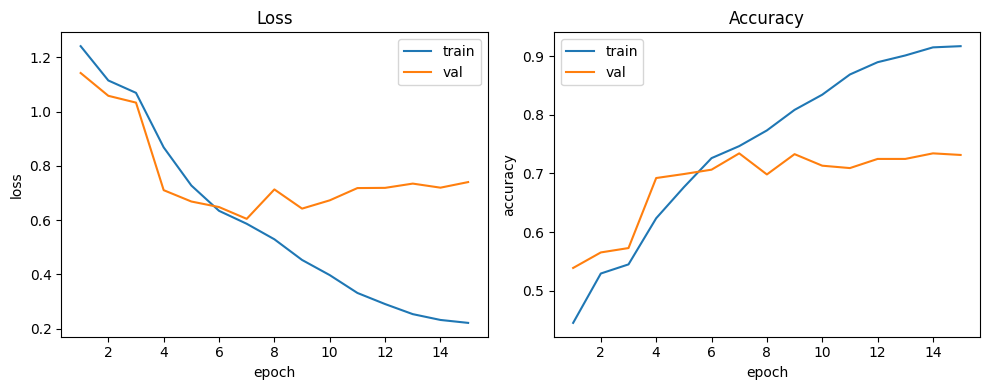

–ì—Ä–∞—Ñ–∏–∫ —Å–æ—Ö—Ä–∞–Ω—ë–Ω –≤ curves.png; –ª–æ–≥–∏ –≤ train_log.jsonl


In [ ]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4) –ú–æ–¥–µ–ª—å + –ø–æ–ª–Ω–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –æ–±—É—á–µ–Ω–∏—è:
#    ‚Ä¢ warm-up + fine-tune
#    ‚Ä¢ –º–Ω–æ–≥–æ —á–µ–∫-–ø–æ–π–Ω—Ç–æ–≤  (last, best, –∫–∞–∂–¥—ã–µ N —ç–ø–æ—Ö)
#    ‚Ä¢ –ª–æ–≥-—Ñ–∞–π–ª –Ω–∞ –¥–∏—Å–∫
#    ‚Ä¢ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ä–µ–∑—é–º–∞ ¬´—Å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω–æ–≥–æ¬ª
#    ‚Ä¢ –∏—Ç–æ–≥–æ–≤—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import torch, torchvision, torch.nn as nn
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import numpy as np, random, matplotlib.pyplot as plt, json, os, glob

# ‚ñë‚ñë –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
seed            = 42
epochs_warm     = 3
epochs_fine     = 12
save_every_N    = 5            # –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π —á–µ–∫-–ø–æ–π–Ω—Ç –∫–∞–∂–¥—ã–µ N —ç–ø–æ—Ö
ckpt_dir        = Path('checkpoints')
ckpt_dir.mkdir(exist_ok=True)
log_path        = 'train_log.jsonl'  # –ª–æ–≥-—Ñ–∞–π–ª: –ø–æ —Å—Ç—Ä–æ–∫–µ = json –æ–¥–Ω–æ–π —ç–ø–æ—Ö–∏
best_ckpt_path  = ckpt_dir/'best_resnet50_age.pth'

# ‚ñë‚ñë –†–µ–ø—Ä–æ–¥—É–∫—Ü–∏—è ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
random.seed(seed); np.random.seed(seed)
torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True; torch.backends.cudnn.benchmark = False

# ‚ñë‚ñë 1. –ó–∞–≥—Ä—É–∑–∫–∞ / —Ä–µ–∑—é–º–∏—Ä–æ–≤–∞–Ω–∏–µ ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
start_epoch   = 1
best_acc      = 0.0

model = torchvision.models.resnet50(weights="IMAGENET1K_V2")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# –ø–æ–ø—Ä–æ–±—É–µ–º –Ω–∞–π—Ç–∏ ¬´–ø–æ—Å–ª–µ–¥–Ω–∏–π¬ª —á–µ–∫-–ø–æ–π–Ω—Ç –¥–ª—è —Ä–µ–∑—é–º–∞
latest_ckpt = sorted(glob.glob(str(ckpt_dir/'last_epoch_*.pth')))[-1:]  # –ø–æ—Å–ª–µ–¥–Ω–∏–π –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É
if latest_ckpt:
    print(f'üîÑ –†–µ–∑—é–º–∞ –∏–∑ {latest_ckpt[0]}')
    checkpoint = torch.load(latest_ckpt[0], map_location=device)
    model.load_state_dict(checkpoint)
    # –≤—ã—Ç–∞—â–∏–º –Ω–æ–º–µ—Ä —ç–ø–æ—Ö–∏ –∏–∑ –∏–º–µ–Ω–∏ —Ñ–∞–π–ª–∞
    start_epoch = int(Path(latest_ckpt[0]).stem.split('_')[-1]) + 1
    # —á–∏—Ç–∞–µ–º best_acc –∏–∑ –ª–æ–≥–∞
    if os.path.exists(log_path):
        with open(log_path, 'r') as f:
            best_acc = max(json.loads(line)["val_acc"] for line in f)
    print(f'   ‚Üí –ø—Ä–æ–¥–æ–ª–∂–∏–º —Å —ç–ø–æ—Ö–∏ {start_epoch}, —Ç–µ–∫—É—â–∏–π best_acc={best_acc:.3f}')

# warm-up: —Ç–æ–ª—å–∫–æ fc, –µ—Å–ª–∏ –Ω–∞—á–∏–Ω–∞–µ–º —Å –Ω—É–ª—è
for n, p in model.named_parameters():
    p.requires_grad = (start_epoch > epochs_warm) or n.startswith('fc')

optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                  lr=3e-4, weight_decay=1e-4)
scheduler = None

# –µ—Å–ª–∏ —É–∂–µ —Ä–∞–∑–º–æ—Ä–æ–∂–µ–Ω–æ (—Ä–µ–∑—é–º) ‚Äî —Å–æ–∑–¥–∞—ë–º –ø–æ–ª–Ω—ã–π –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä + scheduler
if start_epoch > epochs_warm:
    for p in model.parameters(): p.requires_grad = True
    optimizer = AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs_fine)

# ‚ñë‚ñë 2. train / val –æ–¥–∏–Ω –ø—Ä–æ—Ö–æ–¥ ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    total, preds, labels = 0., [], []
    torch.set_grad_enabled(train)

    for i, (x, y) in enumerate(loader, 1):
        x, y = x.to(device), y.to(device)
        if train: optimizer.zero_grad()
        out = model(x); loss = criterion(out, y)
        if train:
            loss.backward(); optimizer.step()

        total += loss.item() * x.size(0)
        preds.extend(out.argmax(1).cpu().numpy())
        labels.extend(y.cpu().numpy())

        # –∫–∞–∂–¥—ã–µ 100 —à–∞–≥–æ–≤ –ø–µ—á–∞—Ç–∞–µ–º –º–∏–Ω–∏-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É ‚Äî –≤–∏–¥–Ω–æ, —á—Ç–æ –∏–¥—ë—Ç
        if i % 100 == 0:
            print(f'  step {i}/{len(loader)}  loss {loss.item():.3f}')

    acc = (np.array(preds) == np.array(labels)).mean()
    return total / len(loader.dataset), acc

# ‚ñë‚ñë 3. –û—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
hist = {"tr_loss": [], "tr_acc": [], "va_loss": [], "va_acc": []}

for epoch in range(start_epoch, epochs_warm + epochs_fine + 1):
    # —Ä–∞–∑–º–æ—Ä–æ–∑–∫–∞ –Ω–∞ 4-–π —ç–ø–æ—Ö–µ, –µ—Å–ª–∏ —Å—Ç–∞—Ä—Ç—É–µ—Ç —Å –Ω—É–ª—è
    if epoch == epochs_warm + 1 and start_epoch == 1:
        for p in model.parameters(): p.requires_grad = True
        optimizer = AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
        scheduler = CosineAnnealingLR(optimizer, T_max=epochs_fine)

    tr_l, tr_a = run_epoch(train_loader, train=True)
    va_l, va_a = run_epoch(val_loader,   train=False)
    if scheduler: scheduler.step()

    # –∑–∞–ø–∏—Å—å –≤ –ª–æ–≥-—Ñ–∞–π–ª
    with open(log_path, 'a') as f:
        f.write(json.dumps({"epoch": epoch,
                            "train_loss": tr_l, "train_acc": tr_a,
                            "val_loss": va_l,   "val_acc": va_a}) + '\n')

    hist["tr_loss"].append(tr_l); hist["tr_acc"].append(tr_a)
    hist["va_loss"].append(va_l); hist["va_acc"].append(va_a)

    lr_now = optimizer.param_groups[0]['lr']
    print(f'E{epoch:02d}/{epochs_warm+epochs_fine} '
          f'| TR {tr_l:.4f}/{tr_a:.3f} | VA {va_l:.4f}/{va_a:.3f} | lr {lr_now:.1e}')

    # —á–µ–∫-–ø–æ–π–Ω—Ç ¬´last¬ª
    torch.save(model.state_dict(), ckpt_dir / f'last_epoch_{epoch:02d}.pth')

    # —á–µ–∫-–ø–æ–π–Ω—Ç ¬´–∫–∞–∂–¥—ã–µ N —ç–ø–æ—Ö¬ª
    if epoch % save_every_N == 0:
        torch.save(model.state_dict(), ckpt_dir / f'epoch_{epoch:02d}.pth')

    # —á–µ–∫-–ø–æ–π–Ω—Ç ¬´best¬ª
    if va_a > best_acc:
        best_acc = va_a
        torch.save(model.state_dict(), best_ckpt_path)
        print('  ‚Ü≥ new best saved')

print(f'‚úì –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –õ—É—á—à–∞—è val-accuracy = {best_acc:.3f}')

# ‚ñë‚ñë 4. –ì—Ä–∞—Ñ–∏–∫–∏ –∏—Ç–æ–≥–æ–≤—ã–µ ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
epochs_done = np.arange(1, len(hist["tr_loss"]) + 1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_done, hist["tr_loss"], label='train')
plt.plot(epochs_done, hist["va_loss"], label='val')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss'); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_done, hist["tr_acc"], label='train')
plt.plot(epochs_done, hist["va_acc"], label='val')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.title('Accuracy'); plt.legend()
plt.tight_layout(); plt.savefig('curves.png', dpi=120); plt.show()
print('–ì—Ä–∞—Ñ–∏–∫ —Å–æ—Ö—Ä–∞–Ω—ë–Ω –≤ curves.png; –ª–æ–≥–∏ –≤', log_path)


‚úÖ –í–µ—Å–∞ –∑–∞–≥—Ä—É–∂–µ–Ω—ã –∏–∑ checkpoints\best_resnet50_age.pth

‚îÄ‚îÄ VAL ‚îÄ‚îÄ
Accuracy          : 0.734
Balanced Accuracy : 0.752
Macro-Precision   : 0.749
Macro-Recall      : 0.752
Macro-F1          : 0.750
              precision    recall  f1-score   support

           0      0.912     0.926     0.919       258
           1      0.745     0.667     0.704       469
           2      0.530     0.575     0.552       367
           3      0.810     0.840     0.825       381

    accuracy                          0.734      1475
   macro avg      0.749     0.752     0.750      1475
weighted avg      0.738     0.734     0.735      1475


‚îÄ‚îÄ TEST ‚îÄ‚îÄ
Accuracy          : 0.702
Balanced Accuracy : 0.722
Macro-Precision   : 0.726
Macro-Recall      : 0.722
Macro-F1          : 0.723
              precision    recall  f1-score   support

           0      0.899     0.903     0.901       257
           1      0.683     0.611     0.645       470
           2      0.487     0.57

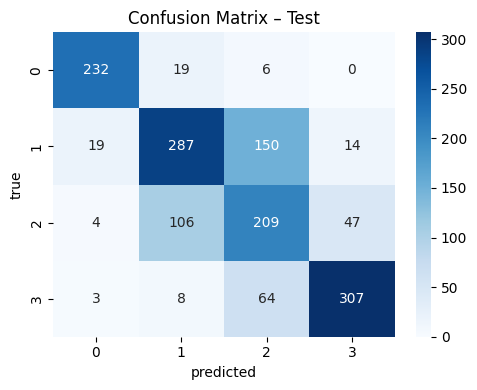

–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ confusion_matrix.png
–õ–æ–≥ –º–µ—Ç—Ä–∏–∫ –Ω–∞–∫–æ–ø–ª–µ–Ω –≤ eval_log.jsonl


In [ ]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 6) –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ + –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏
#    ‚Ä¢ Accuracy, Balanced Accuracy, Macro-F1, Macro-Precision, Macro-Recall
#    ‚Ä¢ ClassificationReport
#    ‚Ä¢ –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ (PNG)
#    ‚Ä¢ –õ–æ–≥-—Ñ–∞–π–ª —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns, json
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix)
from pathlib import Path

# ‚ñë‚ñë –ü—É—Ç–∏ ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
best_ckpt_path = Path('checkpoints') / 'best_resnet50_age.pth'
eval_log_path  = 'eval_log.jsonl'          # –ø–æ—Å—Ç—Ä–æ—á–Ω—ã–π JSON-–ª–æ–≥

# ‚ñë‚ñë 1. –ó–∞–≥—Ä—É–∑–∫–∞ –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤ ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model.load_state_dict(torch.load(best_ckpt_path, map_location=device))
model.eval(); torch.set_grad_enabled(False)
print('‚úÖ –í–µ—Å–∞ –∑–∞–≥—Ä—É–∂–µ–Ω—ã –∏–∑', best_ckpt_path)

# helper: –ø–æ–ª—É—á–∏—Ç—å true/pred —Å–ø–∏—Å–∫–∏ ------------------------------------------
def get_preds(loader):
    y_true, y_pred = [], []
    for x, y in loader:
        x = x.to(device)
        logits = model(x)
        preds  = logits.argmax(1).cpu().numpy()
        y_true.extend(y.numpy()); y_pred.extend(preds)
    return np.array(y_true), np.array(y_pred)

# —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–≤–æ–¥–∞ –∏ –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è ----------------------------------------------
def evaluate_split(name, loader):
    y, p = get_preds(loader)

    acc   = accuracy_score(y, p)
    bacc  = balanced_accuracy_score(y, p)
    mf1   = f1_score(y, p, average='macro')
    mprec = precision_score(y, p, average='macro', zero_division=0)
    mrec  = recall_score(y, p, average='macro', zero_division=0)

    print(f'\n‚îÄ‚îÄ {name} ‚îÄ‚îÄ')
    print(f'Accuracy          : {acc:.3f}')
    print(f'Balanced Accuracy : {bacc:.3f}')
    print(f'Macro-Precision   : {mprec:.3f}')
    print(f'Macro-Recall      : {mrec:.3f}')
    print(f'Macro-F1          : {mf1:.3f}')
    print(classification_report(y, p, digits=3))

    # –∑–∞–ø–∏—Å—å –≤ –ª–æ–≥-—Ñ–∞–π–ª
    with open(eval_log_path, 'a') as f:
        f.write(json.dumps({"split": name,
                            "accuracy": acc,
                            "balanced_accuracy": bacc,
                            "macro_precision": mprec,
                            "macro_recall": mrec,
                            "macro_f1": mf1}) + '\n')
    return y, p

# ‚ñë‚ñë 2. –í–∞–ª–∏–¥a—Ü–∏—è ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
y_val, p_val = evaluate_split('VAL', val_loader)

# ‚ñë‚ñë 3. –¢–µ—Å—Ç ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
y_test, p_test = evaluate_split('TEST', test_loader)

# ‚ñë‚ñë 4. –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ (–ø–æ test) ‚ñë‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
cm = confusion_matrix(y_test, p_test, labels=[0, 1, 2, 3])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('predicted'); plt.ylabel('true'); plt.title('Confusion Matrix ‚Äì Test')
plt.tight_layout(); plt.savefig('confusion_matrix.png', dpi=120); plt.show()
print('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ confusion_matrix.png')
print('–õ–æ–≥ –º–µ—Ç—Ä–∏–∫ –Ω–∞–∫–æ–ø–ª–µ–Ω –≤', eval_log_path)


In [ ]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ò–Ω—Ñ–µ—Ä–µ–Ω—Å –¥–ª—è –æ–¥–∏–Ω–æ—á–Ω–æ–≥–æ —Ñ–∞–π–ª–∞ images\image_1.png
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
from PIL import Image
import torch

img_path = Path(r"samples\image_1.png")        # ‚Üê –≤–∞—à –ø—É—Ç—å

# 1. –ó–∞–≥—Ä—É–∂–∞–µ–º ¬´–ª—É—á—à–∏–µ¬ª –≤–µ—Å–∞ (–µ—Å–ª–∏ –º–æ–¥–µ–ª—å —É–∂–µ –≤ –ø–∞–º—è—Ç–∏ ‚Äì –ø—Ä–æ–ø—É—Å—Ç–∏—Ç–µ)
best_ckpt = Path("checkpoints") / "best_resnet50_age.pth"
model.load_state_dict(torch.load(best_ckpt, map_location=device))
model.eval(); torch.set_grad_enabled(False)

# 2. –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ –∂–µ val-—Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
img = Image.open(img_path).convert("RGB")
tensor = val_transforms(img).unsqueeze(0).to(device)   # shape [1,3,224,224]

# 3. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
logits = model(tensor)
pred_class = logits.argmax(1).item()   # 0,1,2,3

print(f"{img_path}  ‚Üí  –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å –≤–æ–∑—Ä–∞—Å—Ç–∞: {pred_class}")


samples\image_1.png  ‚Üí  –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å –≤–æ–∑—Ä–∞—Å—Ç–∞: 0
